In [1]:
import ee
ee.__version__

'0.1.217'

In [ ]:
ee.Authenticate()

ee.Initialize()

In [4]:
# Import the Folium library.
import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Read DEM
dem = ee.Image('USGS/SRTMGL1_003')

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=500)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

---

In [53]:
import contextily as cx

In [43]:
# Read DEM
dem = ee.Image('USGS/SRTMGL1_003')

# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5'],
    'transparency': 0.5
}

In [44]:
src = dem.getMapId(vis_params)["tile_fetcher"].url_format
src

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps/e772f0b6ccf89aae965d25d9887de682-deba292a9f146a05a1f7d05813b6043c/tiles/{z}/{x}/{y}'

In [54]:
liv = cx.Place("Belgium", source=src)

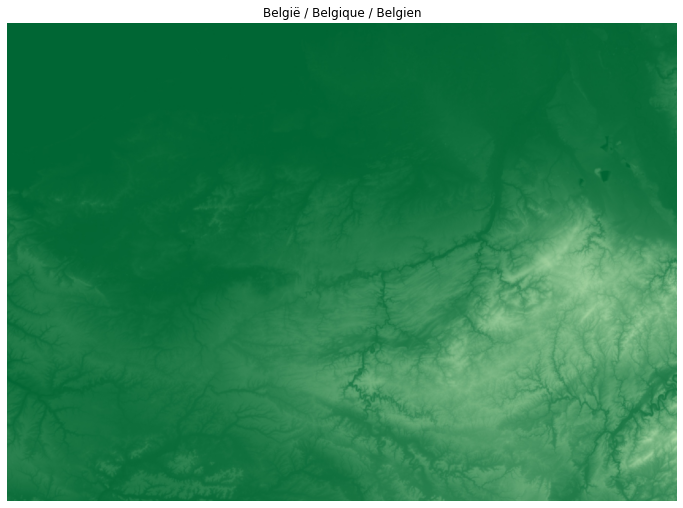

In [55]:
liv.plot()

## Sentinel-2

- Javascript version

```js
var s2 = ee.ImageCollection("COPERNICUS/S2_SR")
var liv = ee.Geometry.Point(-2.9560089111328125, 53.410759745620574)
var sub = s2.filterDate("2020-01-01", "2020-04-15")
            .filterBounds(liv)
            .filterMetadata("CLOUDY_PIXEL_PERCENTAGE", "less_than", 5)
//            .median()


print(sub)

//-----------------
var vizParams = {
  bands: ["B4", "B3", "B2"],
  gain: '0.1, 0.1, 0.1', 
  scale:20
};
// Center the map and display the image.
Map.setCenter(-2.9560089111328125, 53.410759745620574, 10);
Map.addLayer(sub, vizParams, 'mosaic');

print(sub.getMap())
```

- Python version

In [70]:
s2 = ee.ImageCollection("COPERNICUS/S2_SR")
liv = ee.Geometry.Point(-2.9560089111328125, 53.410759745620574)
sub = s2.filterDate("2020-01-01", "2020-04-15")\
        .filterBounds(liv)\
        .filterMetadata("CLOUDY_PIXEL_PERCENTAGE", "less_than", 5)\
        .mosaic()

vizParams = {
  "bands": ["B4", "B3", "B2"],
  "gain": '0.1, 0.1, 0.1', 
  "scale":20
}

s2_url = sub.getMapId(vizParams)["tile_fetcher"].url_format
s2_url

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps/4f3b68fc8f2ff921ae043b4250bfc4d1-ce99c79064edcb68c827bc743e24a268/tiles/{z}/{x}/{y}'

In [71]:
liv = cx.Place("Liverpool, UK", source=s2_url)

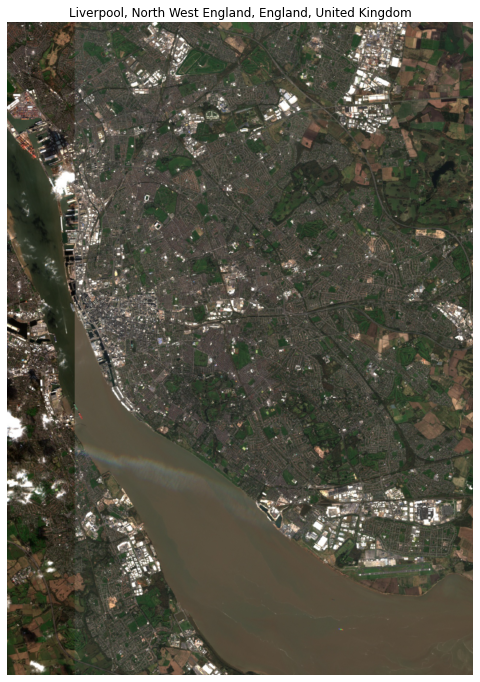

In [72]:
liv.plot();